In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
advanced_df = pd.read_csv("dataset_mood_smartphone (1).csv", index_col=0)

In [61]:
advanced_df.head()

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


## Define function

In [73]:
# Check the shape of a dataframe, along with NaN values
def check_df(df):
    print(df.shape)
    for item in df.columns:
        print(item, ': ', type(df[item]), ', contains NaN:',df[item].isnull().values.any())

# Plot all the variables vs time
def plot_feature(df, variable_name):
    ylabel_text = f"{variable_name} value"
    title_text = f"{variable_name} vs time"
    plot = df[(df['variable'] == variable_name) & (df['id'] == specific_id)]

    plt.plot(plot['time'], plot['value'])
    plt.xlabel('time')
    plt.ylabel(ylabel_text)
    plt.title(title_text)
    plt.show()

# Plot histograms of all the variables
def plot_histograms(df, variable_name):
    df[(df['variable'] == variable_name) & (df['id'] == specific_id)].plot(kind='hist', edgecolor='black')
    plt.xlabel(variable_name)

# Remove outliers >0.75 and <0.25 of all values
def remove_outliers(df, column_name, multiplier=1.5):
    q1 = df[column_name].quantile(0.25)
    q2 = df[column_name].quantile(0.75)
    iqr = q2 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q2 + multiplier * iqr
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Compare 2 histograms
def histogram_comparison(df1, df2, variable_name):
    plot1 = df1[(df1['variable'] == variable_name) & (df1['id'] == specific_id)]
    plot2 = df2[(df2['variable'] == variable_name) & (df2['id'] == specific_id)]
    plt.hist(plot1, label = df1, alpha=0.5, bins = 10, color= ['yellow', 'yellow','yellow', 'yellow'])
    plt.hist(plot2, label = df2, alpha = 0.5, bins = 10, color = ['purple', 'purple','purple', 'purple'])
    plt.xlabel(f"{variable_name} value")
    plt.ylabel('Frequency')
    plt.title('Comparing two histograms')
    plt.show()

## Check for dataframe shape and NaN values

In [63]:
check_df(advanced_df)

(376912, 4)
id :  <class 'pandas.core.series.Series'> , contains NaN: False
time :  <class 'pandas.core.series.Series'> , contains NaN: False
variable :  <class 'pandas.core.series.Series'> , contains NaN: False
value :  <class 'pandas.core.series.Series'> , contains NaN: True


## Drop rows with NaN values

In [64]:
advanced_df.dropna(inplace=True)
check_df(advanced_df)

(376710, 4)
id :  <class 'pandas.core.series.Series'> , contains NaN: False
time :  <class 'pandas.core.series.Series'> , contains NaN: False
variable :  <class 'pandas.core.series.Series'> , contains NaN: False
value :  <class 'pandas.core.series.Series'> , contains NaN: False


## Sort dataframe by id and time

In [65]:
advanced_df = advanced_df.sort_values(['id', 'time'])

## Set the participant to AS14.01, plot all features vs time

In [66]:
specific_id = 'AS14.01'

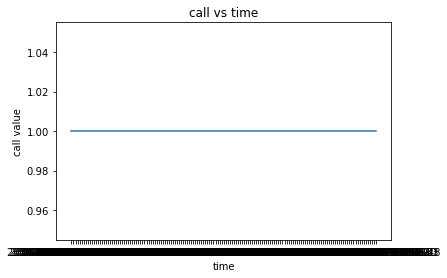

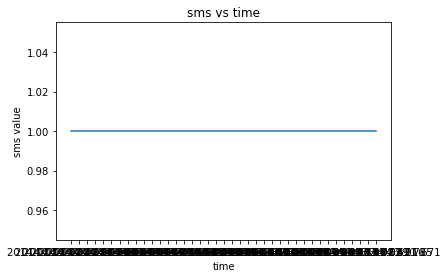

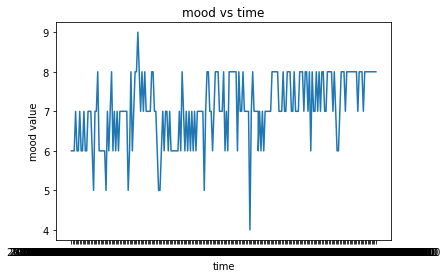

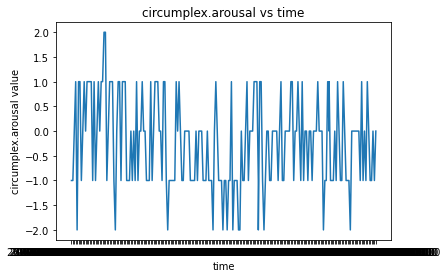

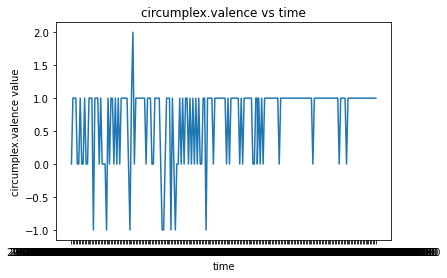

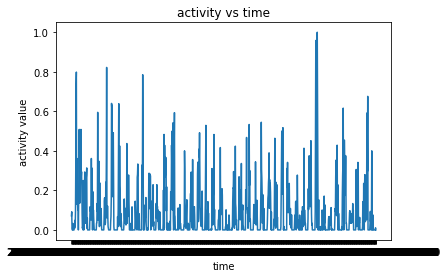

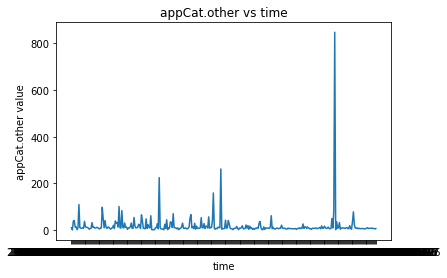

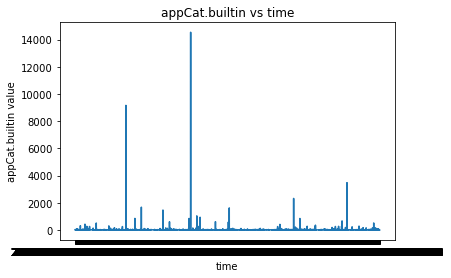

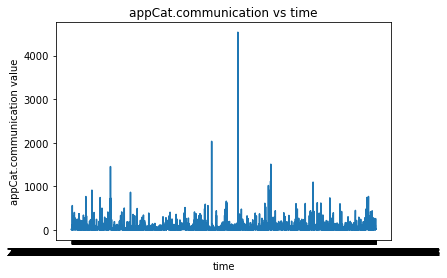

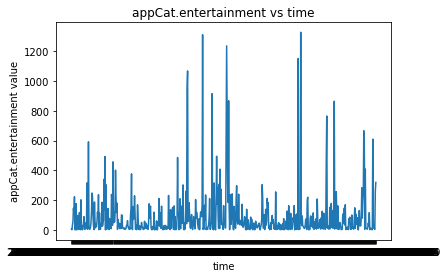

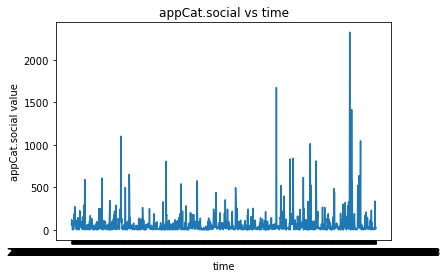

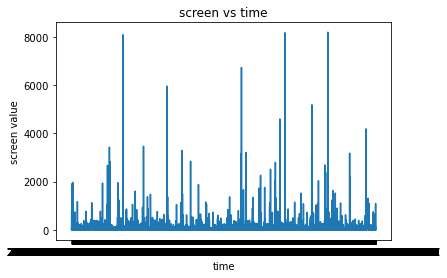

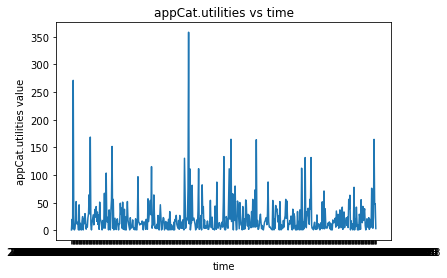

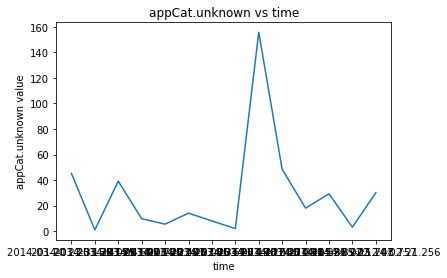

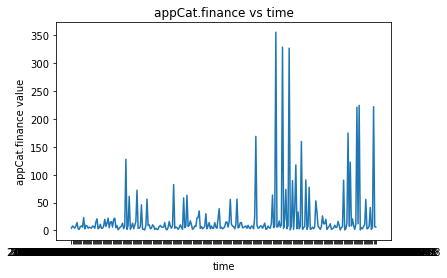

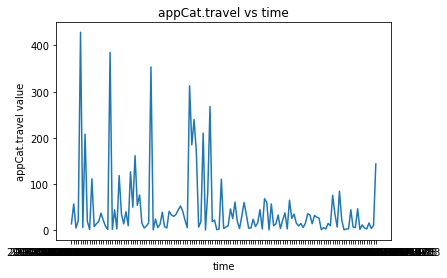

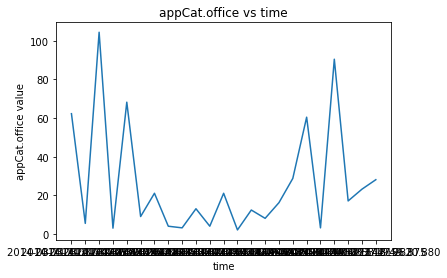

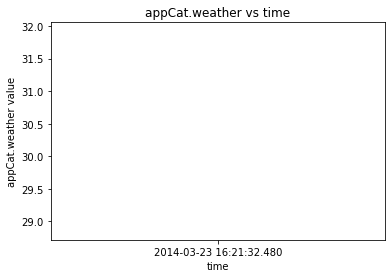

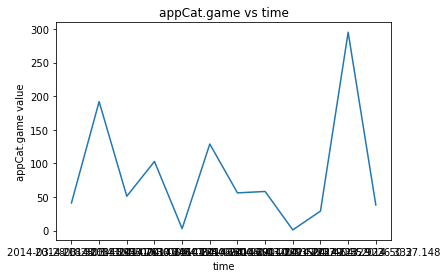

In [67]:
for name in advanced_df['variable'].unique():
    plot_feature(advanced_df, name)

## Plot variable values to check for distribution for participant AS14.01

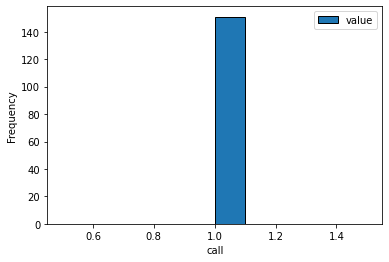

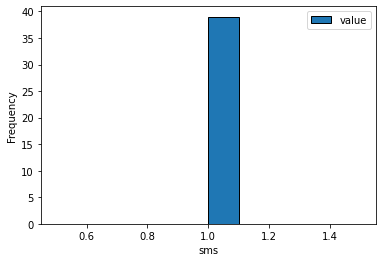

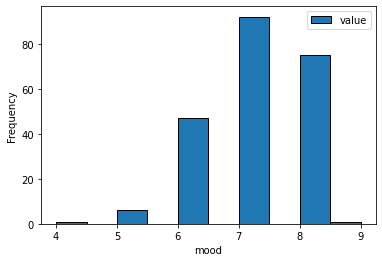

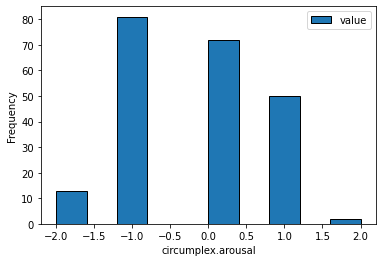

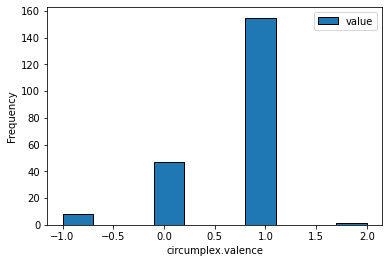

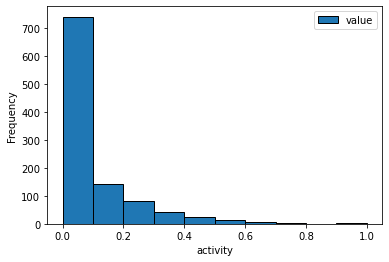

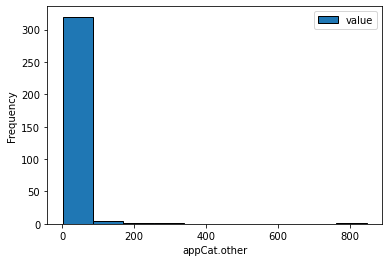

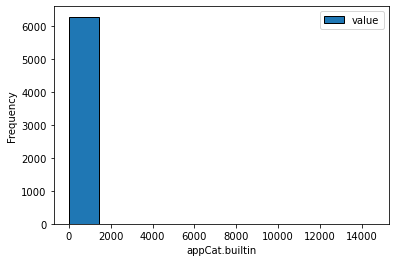

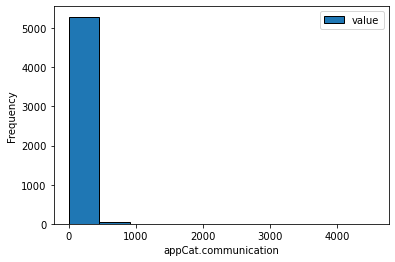

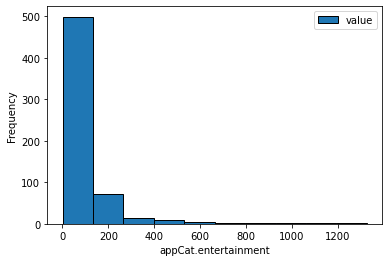

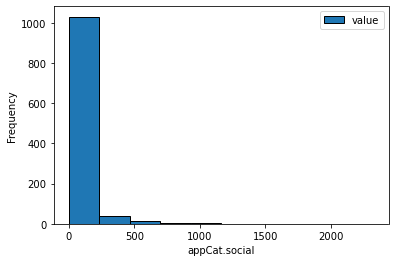

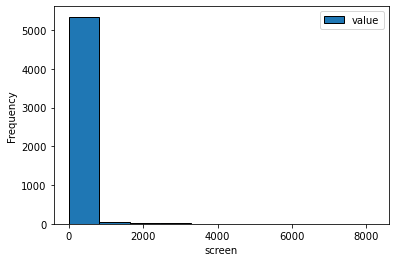

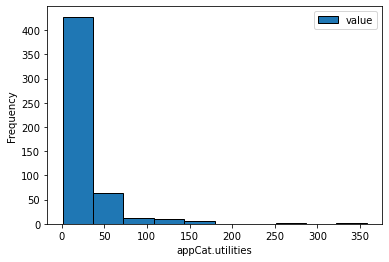

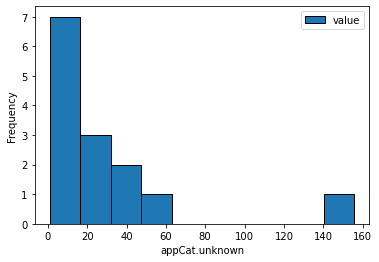

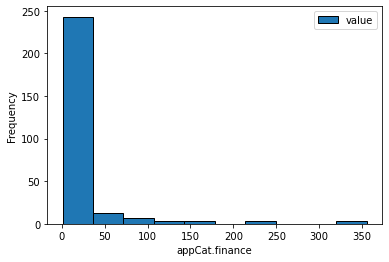

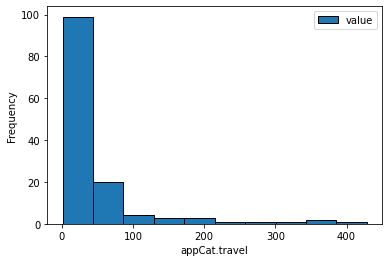

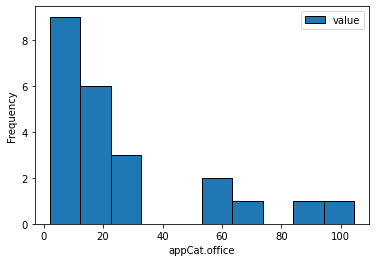

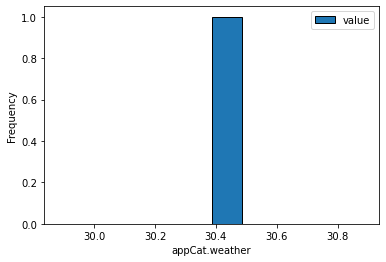

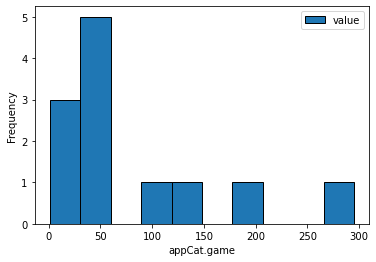

In [68]:
for name in advanced_df['variable'].unique():
    plot_histograms(advanced_df, name)

## Calculate mean and sd for each variable

In [69]:
result = advanced_df.groupby('variable')['value'].agg(['mean', 'std'])

## Remove outliers for all participants

In [70]:
filtered_data = []
for name in advanced_df['variable'].unique():
    group = advanced_df[advanced_df['variable'] == name]
    filtered_group = remove_outliers(group, 'value')
    filtered_data.append(filtered_group)

clean_df = pd.concat(filtered_data)

## Check variable distribution for participant AS14.01 with the new data

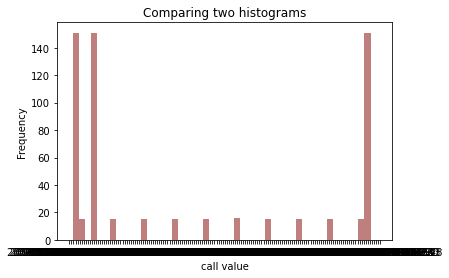

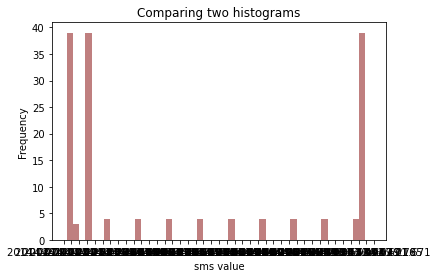

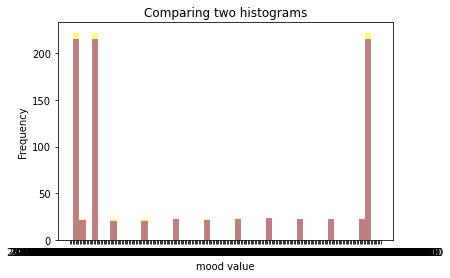

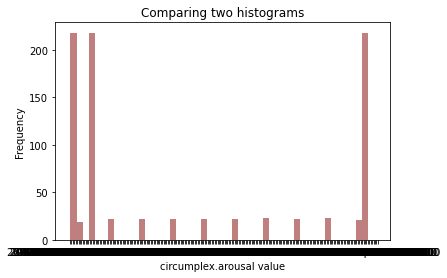

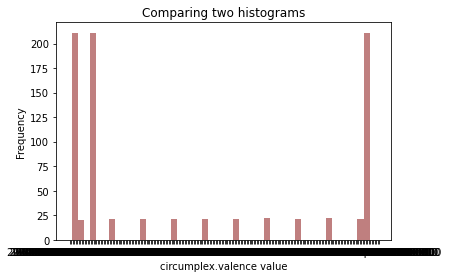

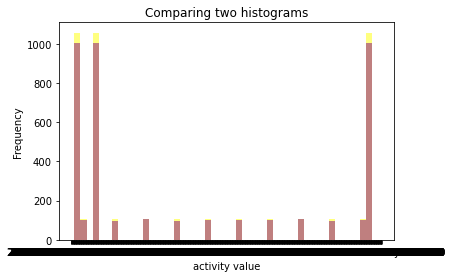

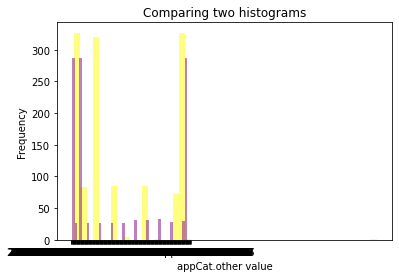

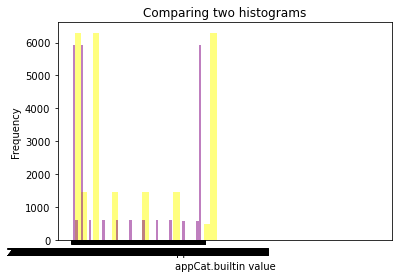

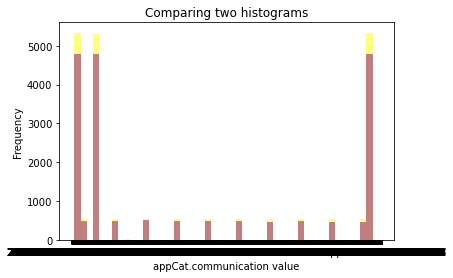

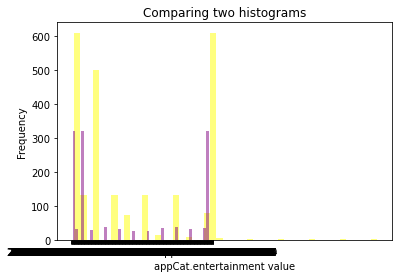

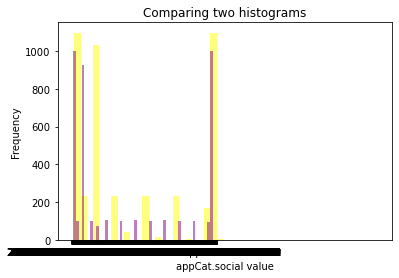

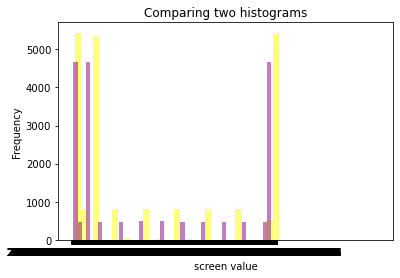

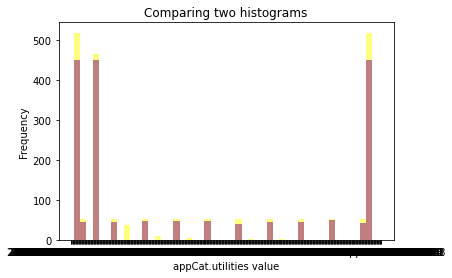

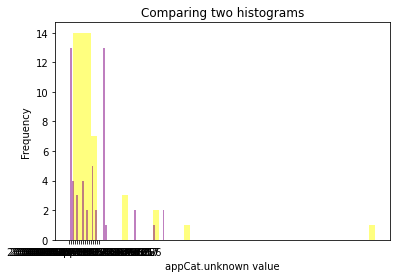

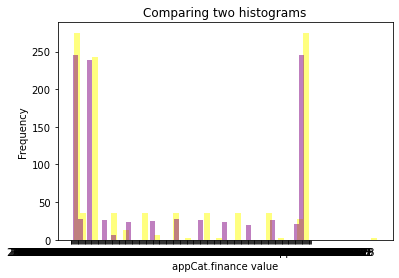

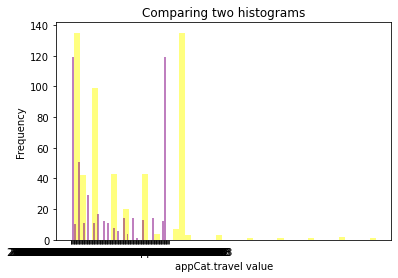

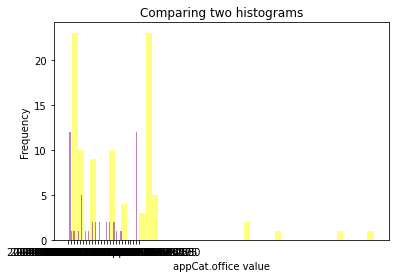

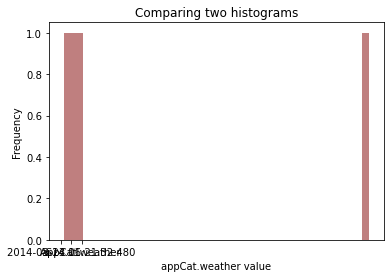

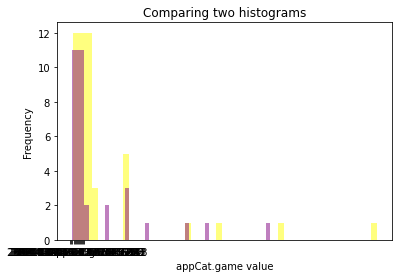

In [74]:
for name in clean_df['variable'].unique():
    histogram_comparison(advanced_df, clean_df, name)